# Importing some utilities

In [1]:
%cd ../..
import glob
import sys
from dmg.realism.mle import whichFitsBetter
from scripts.modelSet import datasets_supported
msetObject = datasets_supported['ecore-github']
train_path = 'data/ecore-github/train'
backend = 'java'

/home/antolin/wakame/DMG-Python


# Loading Training set

In [2]:
Gs = [msetObject.getGraphReal(f,backend) 
                for f in glob.glob(train_path + "/*")]

# RandomEMF

For each rule in RandomEMF, depending on the type of rule, we estimate its parameters. More concretely, for shapes we use the function `whichFitsBetter` that selects the best distribuntion by using maximum likeihood. For priorities in alternative rules, the procedure described in the paper is done and it is based on counting each different alternative in the set $R_{II}$.

## Number of classifiers

For the rule:

``` 
Package: EPackage ->
    eClassifiers += Classifier#Distribution(parameters);
```

(array([0.06785714, 0.06547619, 0.02142857, 0.01190476, 0.00952381,
        0.0047619 , 0.00595238, 0.00119048, 0.00119048, 0.        ,
        0.00357143, 0.00238095, 0.        , 0.00238095, 0.        ,
        0.        , 0.        , 0.00238095, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
         65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
        130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
        195]),
 <a list of 39 Patch objects>)

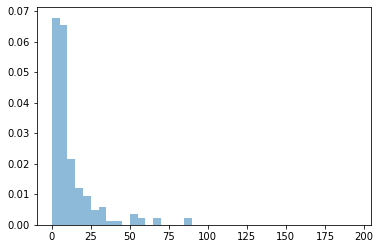

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def isClassifier(tp):
    if tp == 'EClass':
        return True
    if tp == 'EDataType':
        return True
    if tp == 'EEnum':
        return True
    return False

bins = np.arange(0, 200, 5)
numberClassifiers = [len([n for n in G if isClassifier(G.nodes[n]['type'])]) for G in Gs]
plt.hist(numberClassifiers, bins = bins, alpha=0.5, density = True)

In [4]:
whichFitsBetter(numberClassifiers)

Optimization terminated successfully.
         Current function value: 3.502546
         Iterations: 38
         Function evaluations: 73
Optimization terminated successfully.
         Current function value: 4.123244
         Iterations: 27
         Function evaluations: 55
Optimization terminated successfully.
         Current function value: 8.080841
         Iterations: 14
         Function evaluations: 28


{'dis': 'nbinom', 'params': (1.0, 0.09419666016825676)}

## Proportions of classifiers that a package has

For the rule:

``` 
alter Classifier : EClassifier ->
  	Enum#a | DataType#b |Class#c
  ;
```

In [5]:
import numpy as np
ps = []
for G in Gs:
    p = [0, 0, 0]
    for n in G[0]:
        if (G.nodes[n]['type'] == 'EClass'):
            p[0] = p[0] + 1
        if (G.nodes[n]['type'] == 'EDataType'):
            p[1] = p[1] + 1
        if (G.nodes[n]['type'] == 'EEnum'):
            p[2] = p[2] + 1
    p = np.array(p)
    ps.append(p/np.sum(p))
ps = np.array(ps)
print(np.mean(ps, axis = 0)/np.min(np.mean(ps, axis = 0)))

[18.41961453  2.05460123  1.        ]


## Number of eliterals

For the rule:

``` 
Enum : EEnum ->
  	eLiterals += Literal#Distribution(parameters);
  ;
```

In [6]:
numberEliterals = []
for G in Gs:
    for n in G:
        if G.nodes[n]['type'] =='EEnum':
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'eLiterals'):
                        cont = cont + 1
            numberEliterals.append(cont)

mean 3.775
var 15.524375000000001


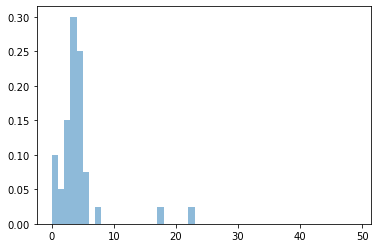

In [7]:
bins = np.arange(0, 50, 1)
plt.hist(numberEliterals, bins = bins, alpha=0.5, density = True)

print('mean',np.mean(numberEliterals))
print('var',np.var(numberEliterals))

In [8]:
whichFitsBetter(numberEliterals)

Optimization terminated successfully.
         Current function value: 2.367930
         Iterations: 43
         Function evaluations: 84
Optimization terminated successfully.
         Current function value: 2.790144
         Iterations: 24
         Function evaluations: 49
Optimization terminated successfully.
         Current function value: 2.817899
         Iterations: 12
         Function evaluations: 24


{'dis': 'nbinom', 'params': (2.0, 0.38618380738846136)}

## Distribution Structural Features

For the rule:

``` 
Class: EClass ->
    eStructuralFeatures += Feature(self)#Distribution(parameters);
  ;
```

In [9]:
numberStrctFeat= []
for G in Gs:
    for n in G:
        if G.nodes[n]['type'] =='EClass':
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'eStructuralFeatures'):
                        cont = cont + 1
            numberStrctFeat.append(cont)

In [10]:
whichFitsBetter(numberStrctFeat)

Optimization terminated successfully.
         Current function value: 1.380651
         Iterations: 27
         Function evaluations: 54
Optimization terminated successfully.
         Current function value: 1.972574
         Iterations: 20
         Function evaluations: 41
Optimization terminated successfully.
         Current function value: 1.644862
         Iterations: 10
         Function evaluations: 20


{'dis': 'nbinom', 'params': (1.0, 0.3736130054279548)}

## SuperTypes

For the rule:

``` 
Class: EClass ->
    eSuperTypes +=  Uniform(model.EClassifiers.filter[
      it instanceof org.eclipse.emf.ecore.EClass
    ].filter[!this.self.EAllSuperTypes.contains(it)].map[it as org.eclipse.emf.ecore.EClass])#Distribution(parameters);
  ;
```

In [11]:
superTypes= []
for G in Gs:
    for n in G:
        if G.nodes[n]['type'] =='EClass':
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'eSuperTypes'):
                        cont = cont + 1
                superTypes.append(cont)

In [12]:
whichFitsBetter(superTypes)

Optimization terminated successfully.
         Current function value: 0.901515
         Iterations: 18
         Function evaluations: 37
Optimization terminated successfully.
         Current function value: 0.846945
         Iterations: 9
         Function evaluations: 18


/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/home/antolin/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


{'dis': 'poisson', 'params': 0.4585622163840459}

## EAttributes vs EReferences

For the rule:

``` 
alter Feature (EClass c): EStructuralFeature ->  
     if (model.EClassifiers.filter[it instanceof EDataType].size > 0) Attribute#a |if (model.EClassifiers.filter[it instanceof org.eclipse.emf.ecore.EClass].size > 0)
     Reference(c)#b
  ;
```

Estimating `a` and `b`.

In [13]:
ps = []
for G in Gs:
    p = [0, 0]
    for n in G:
        if (G.nodes[n]['type'] == 'EAttribute'):
            p[0] = p[0] + 1
        if (G.nodes[n]['type'] == 'EReference'):
            p[1] = p[1] + 1
    p = np.array(p)
    if (np.sum(p) != 0):
        ps.append(p/np.sum(p))
    else:
        ps.append(p)
ps = np.array(ps)
print(np.mean(ps, axis = 0)/np.min(np.mean(ps, axis = 0)))

[1.         3.70620137]


## EOpposite

For the rule:

``` 
Reference(EClass c):EReference ->
    eOpposite := if (UniformBool(a)) ReferenceOpp(self.EType as EClass,self,c)
  ; 
```

Estimating `a` by calculating the proportion of references that contain an opposite one.

In [14]:
opposite= []
for G in Gs:
    for n in G:
        if G.nodes[n]['type'] =='EReference':
            cont = 0
            for e in G[n]:
                for e2 in G[n][e]:
                     if (G[n][e][e2]['type'] == 'eOpposite'):
                        cont = cont + 1
                opposite.append(cont)

In [15]:
len([n for n in opposite if n == 1])/len(opposite)

0.1292834890965732